In [36]:
import pandas as pd
import numpy as np
from ultralytics import YOLO
import cv2
from matplotlib import pyplot as plt
from IPython.display import display, Image
import glob
import os
import json
import math
import matplotlib.image as mpimg
from matplotlib import rcParams

In [ ]:
# !pip install roboflow

# from roboflow import Roboflow
# rf = Roboflow(api_key="API-KEY")
# project = rf.workspace("learning-fkrr5").project("person-detection-mjjvf")
# dataset = project.version(1).download("coco")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Person-Detection-1 in coco:: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 556/556 [00:00<00:00, 4077.92it/s]


In [41]:
home_path = os.getcwd()
print(home_path)

/Users/anujjain/Desktop/Side_Project/HappyMonk/Task2


In [10]:
!yolo task=detect mode=train model=yolov8n.pt conf=0.25 data='face_mask_detection_yolov5/face_data/dataset.yaml' epochs=10

New https://pypi.org/project/ultralytics/8.0.222 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.221 🚀 Python-3.10.9 torch-2.1.1 CPU (Apple M1)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/Users/anujjain/Desktop/Side_Project/HappyMonk/Task2/face_mask_detection_yolov5/face_data/dataset.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=0.25, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, sho

<h3>Evaluation Metrics</h3>

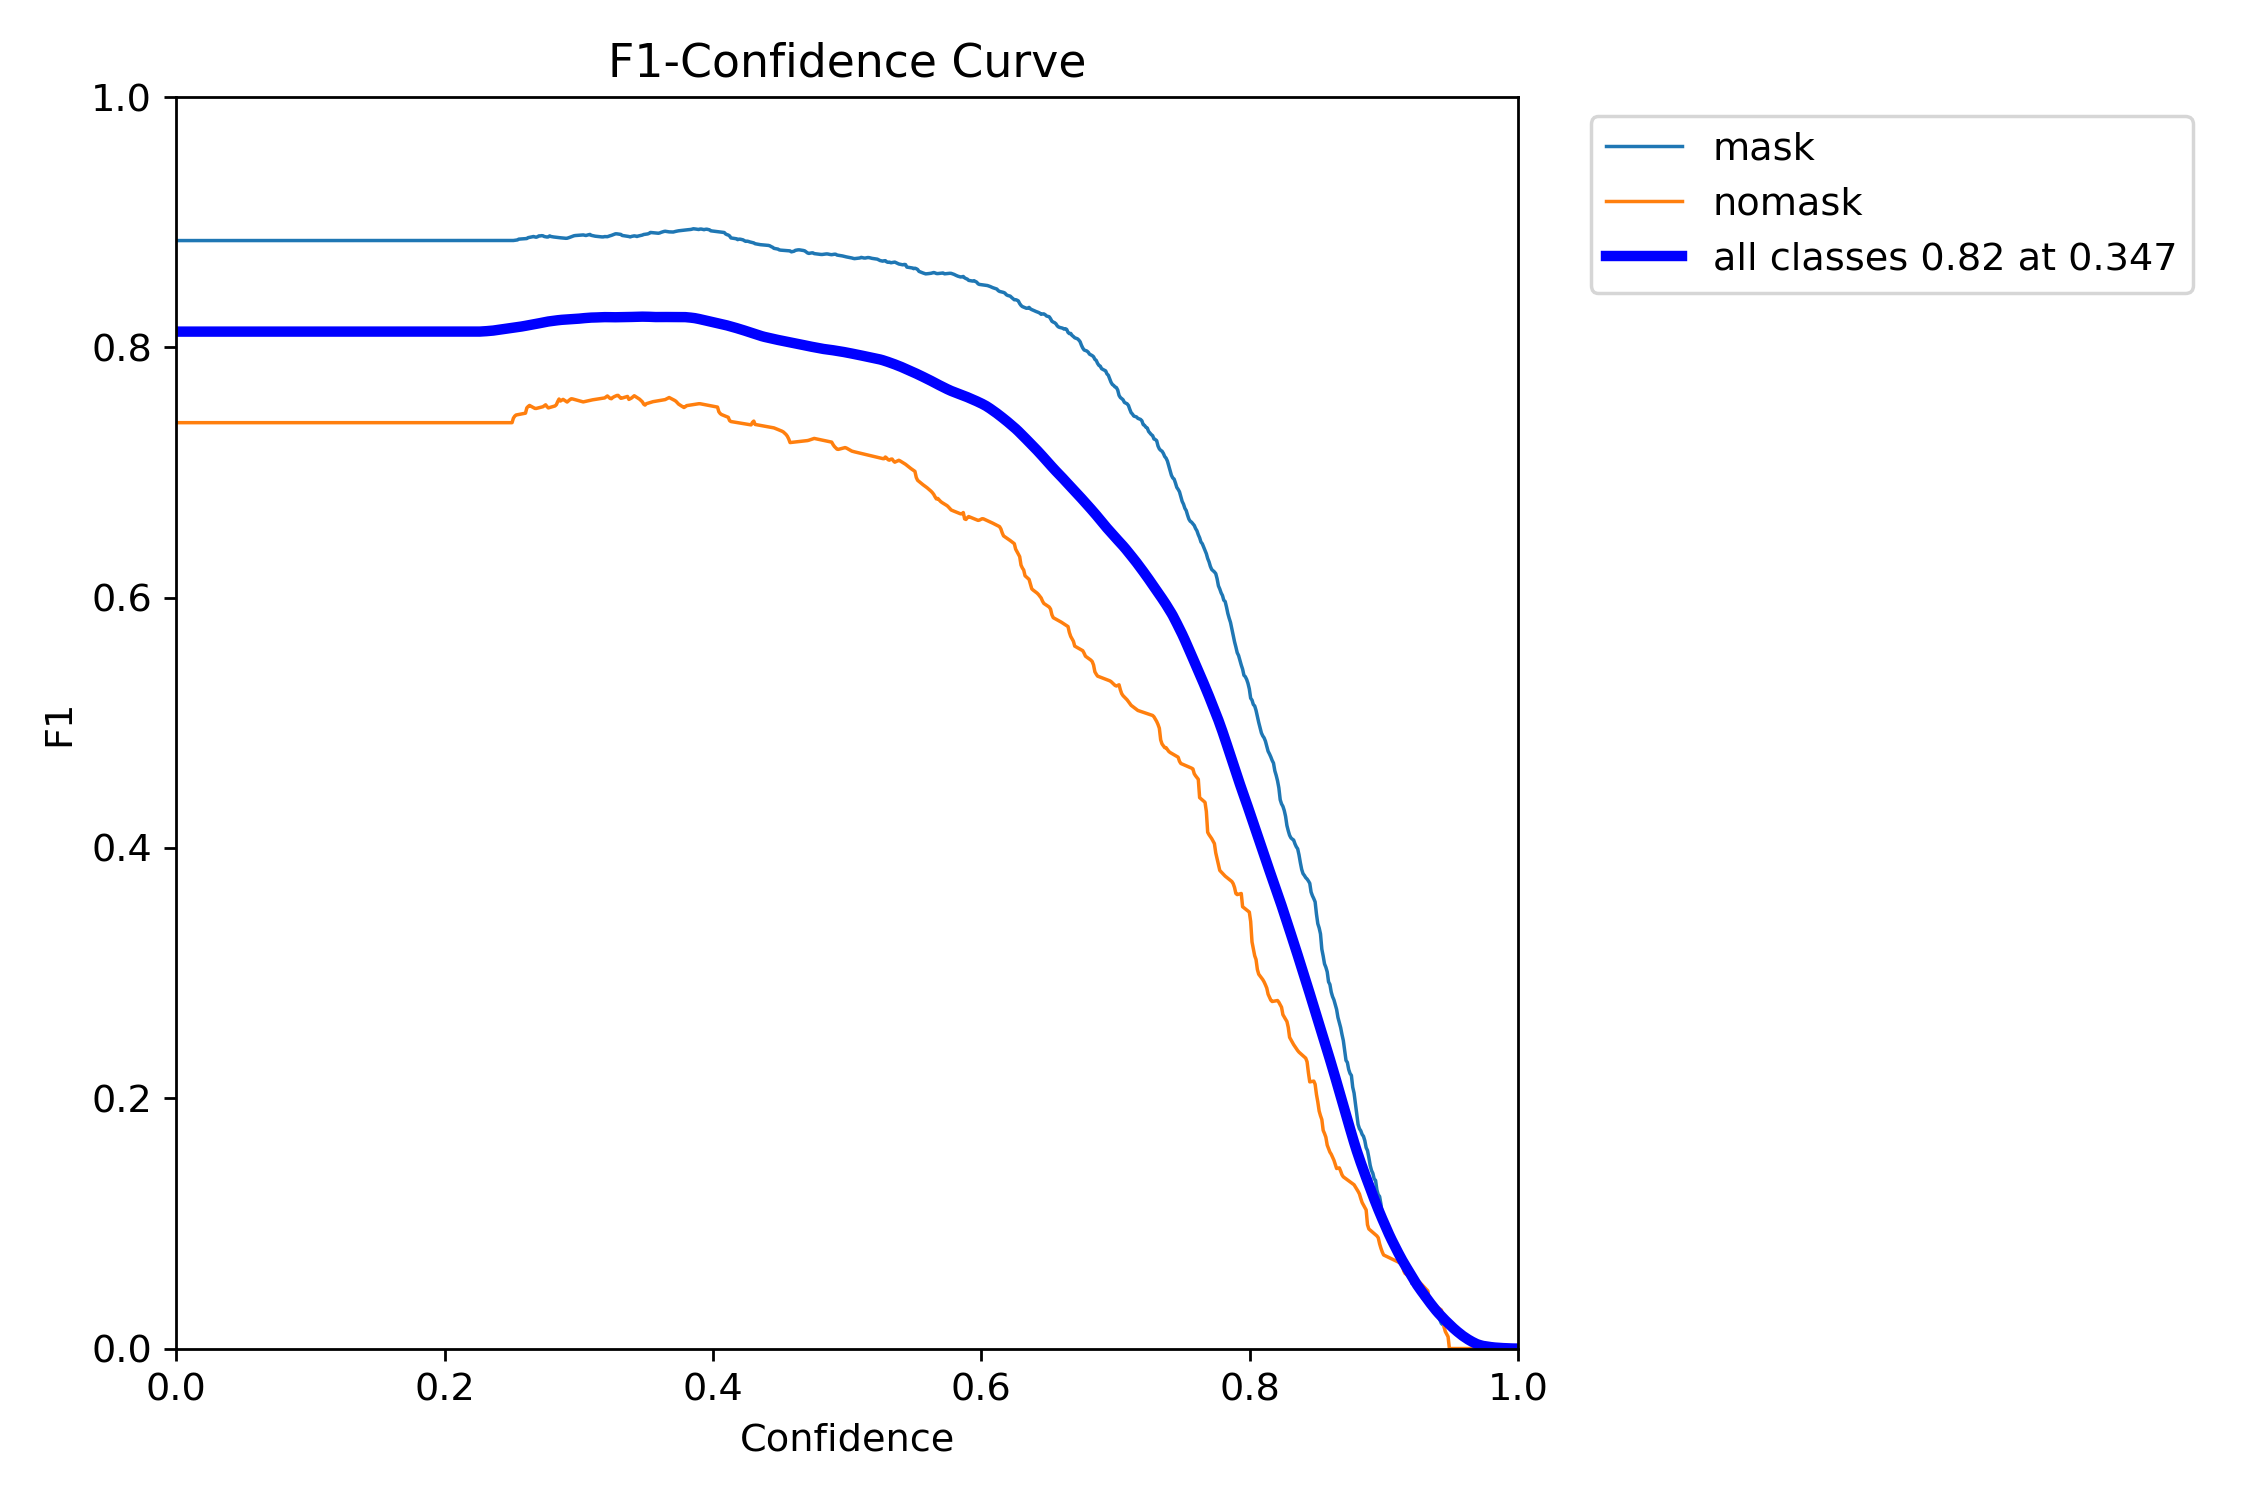

In [42]:
display(Image(filename='runs/detect/train6/F1_curve.png', width=600))

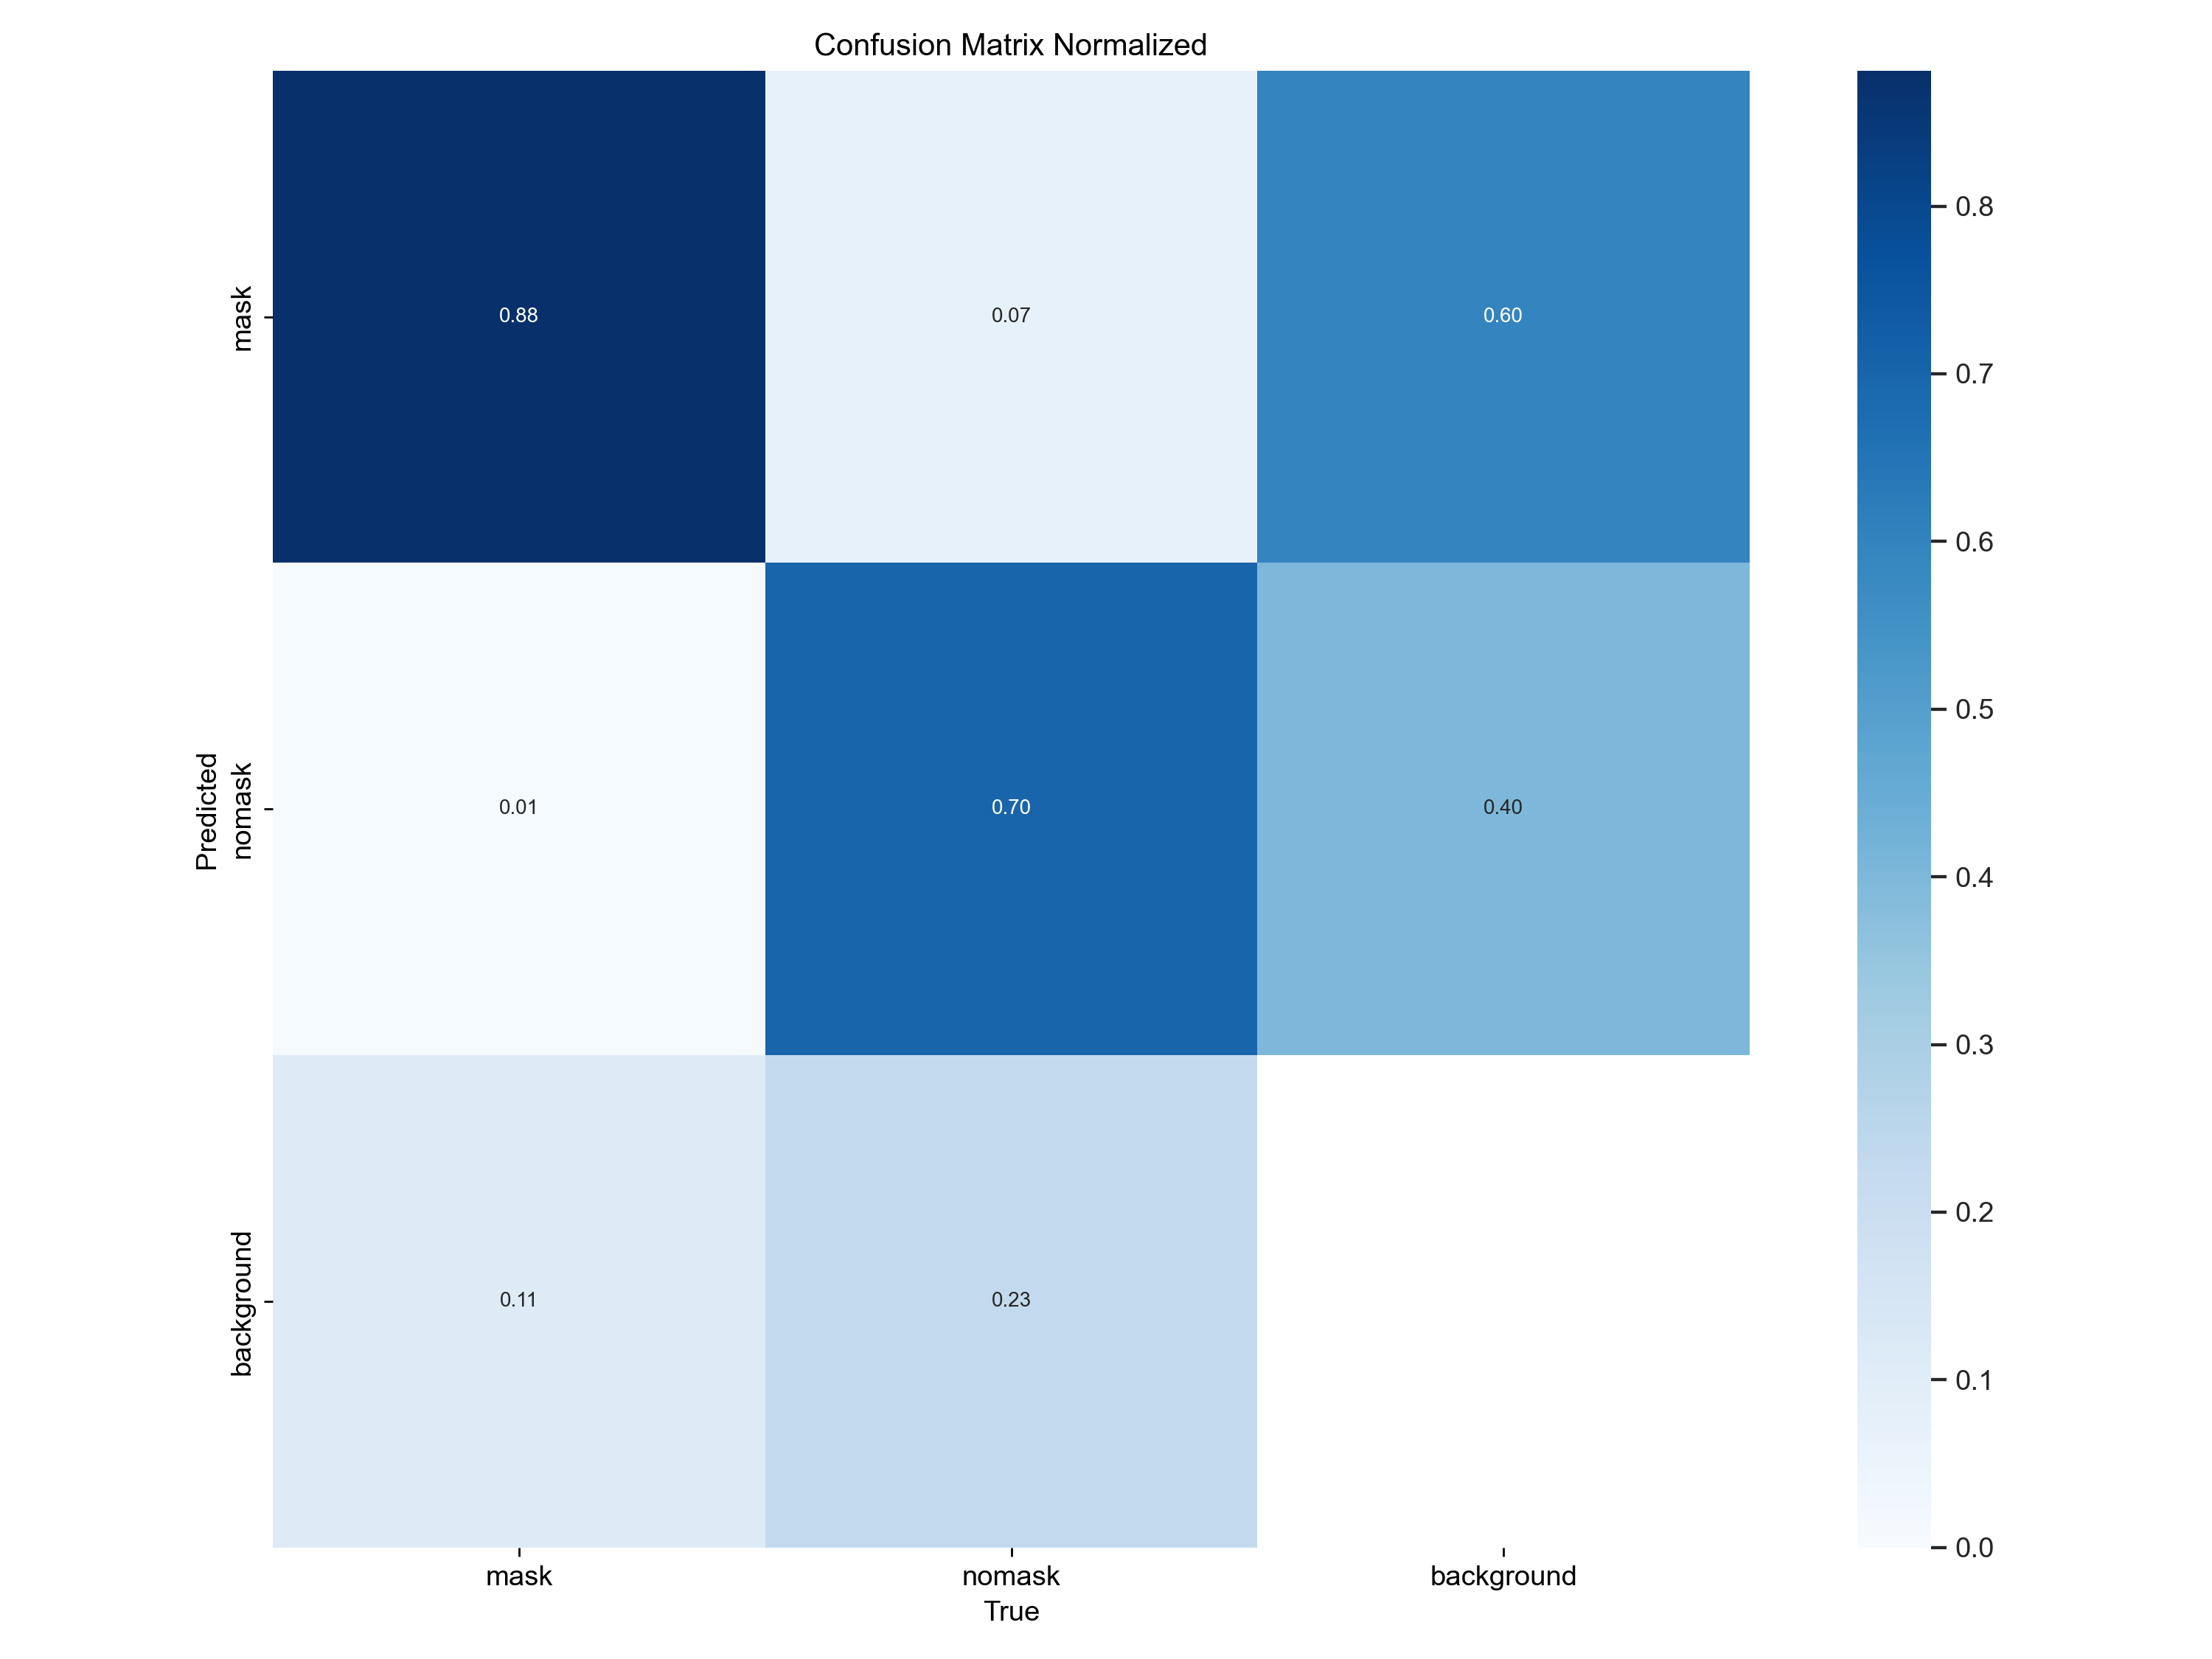

In [44]:
display(Image(filename='runs/detect/train6/confusion_matrix_normalized.png',width=600))

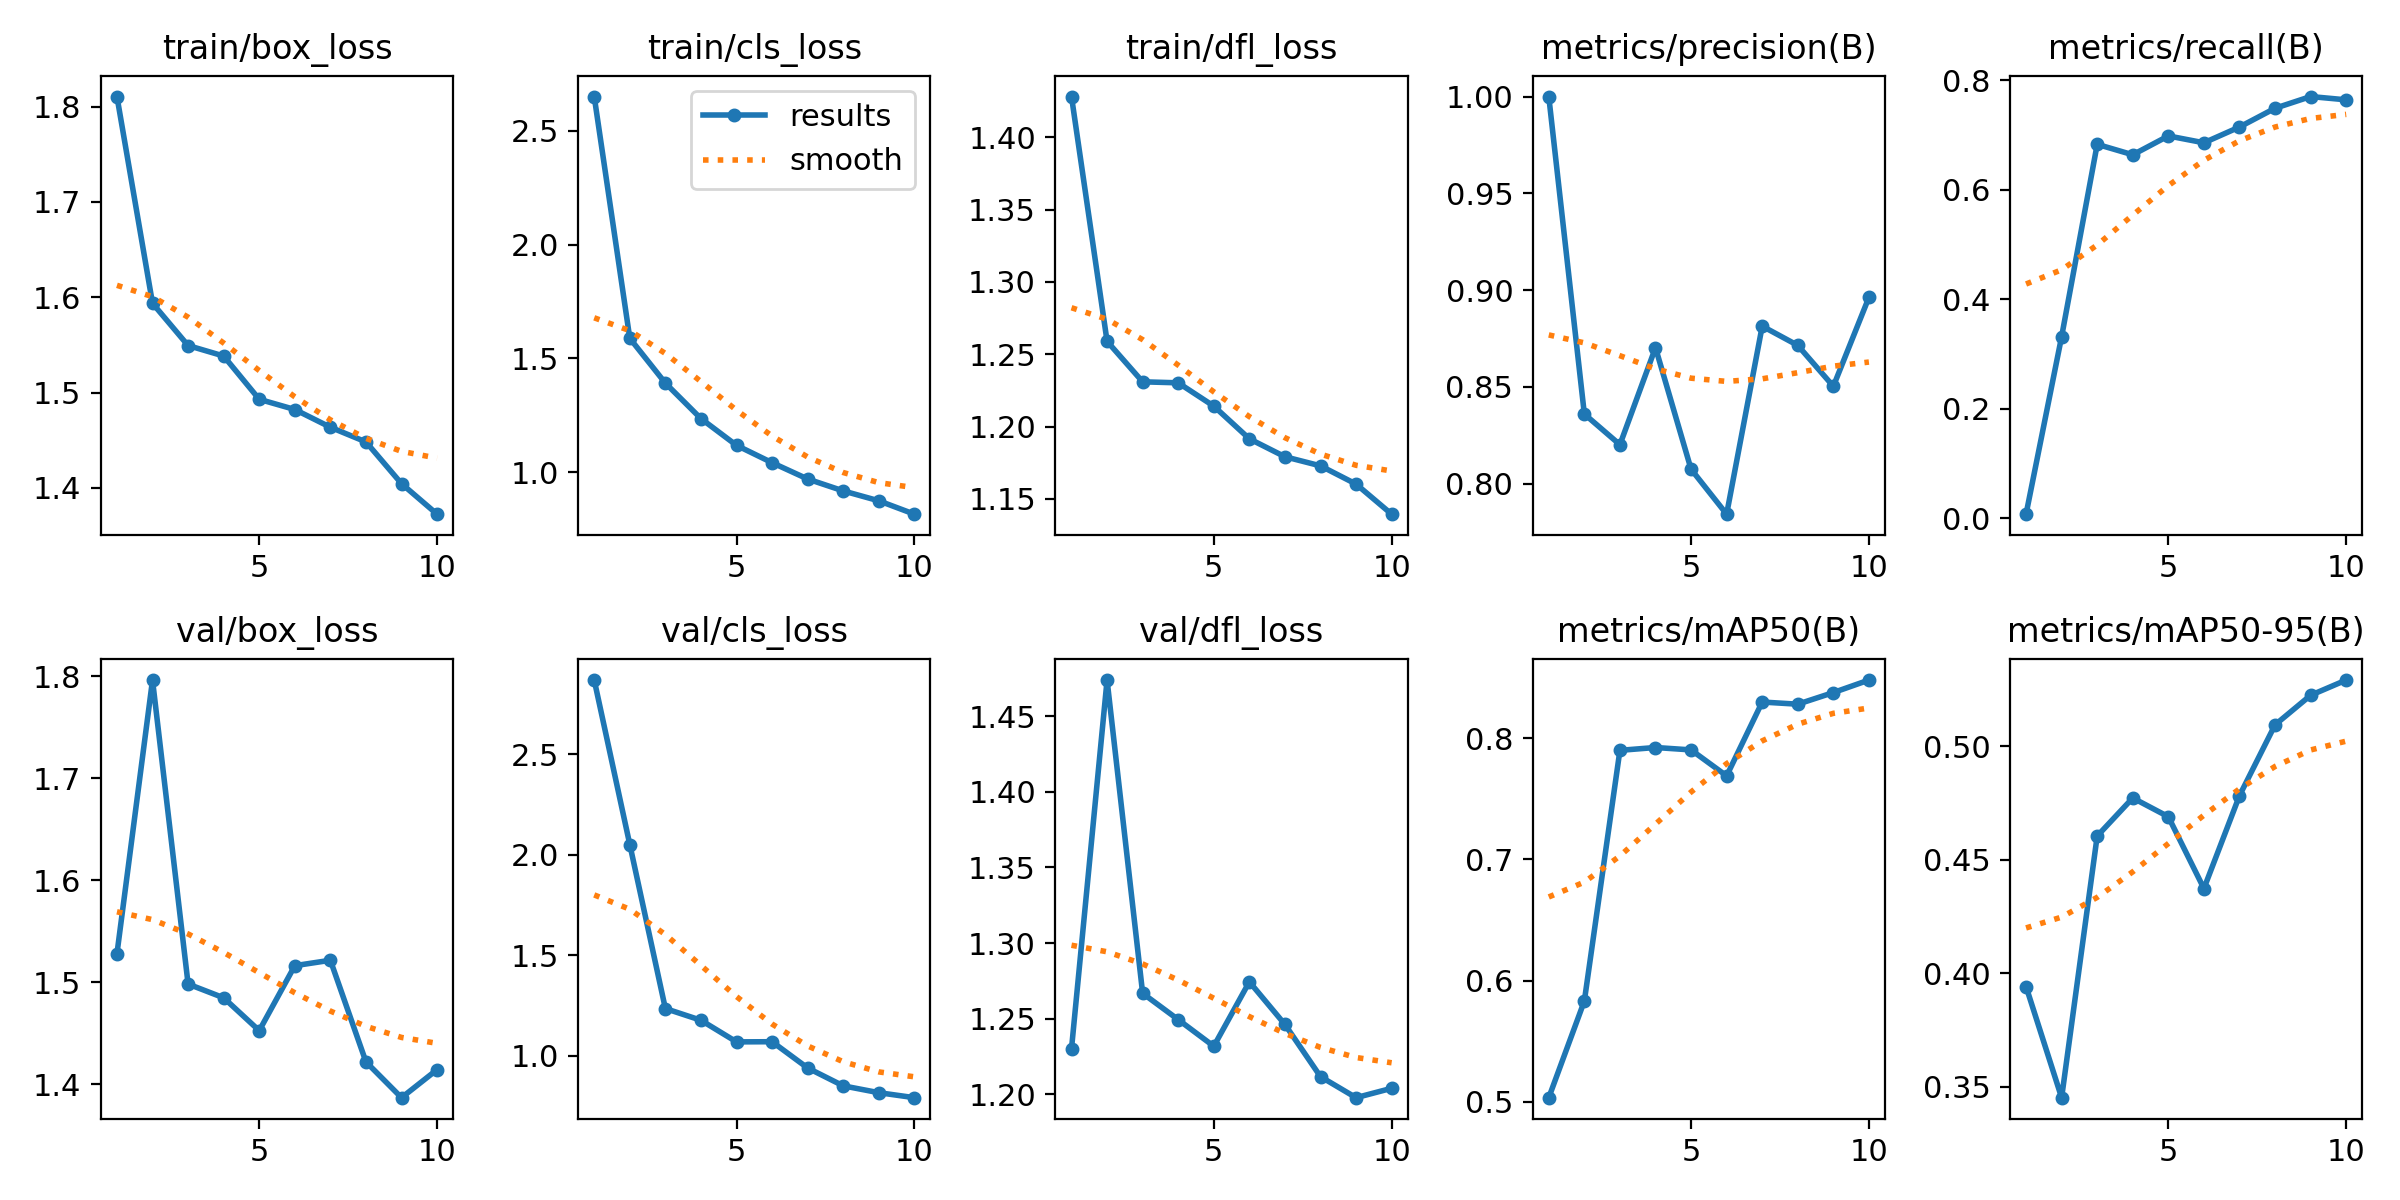

In [45]:
display(Image(filename='runs/detect/train6/results.png', width=900))

<h3>Training Output</h3>

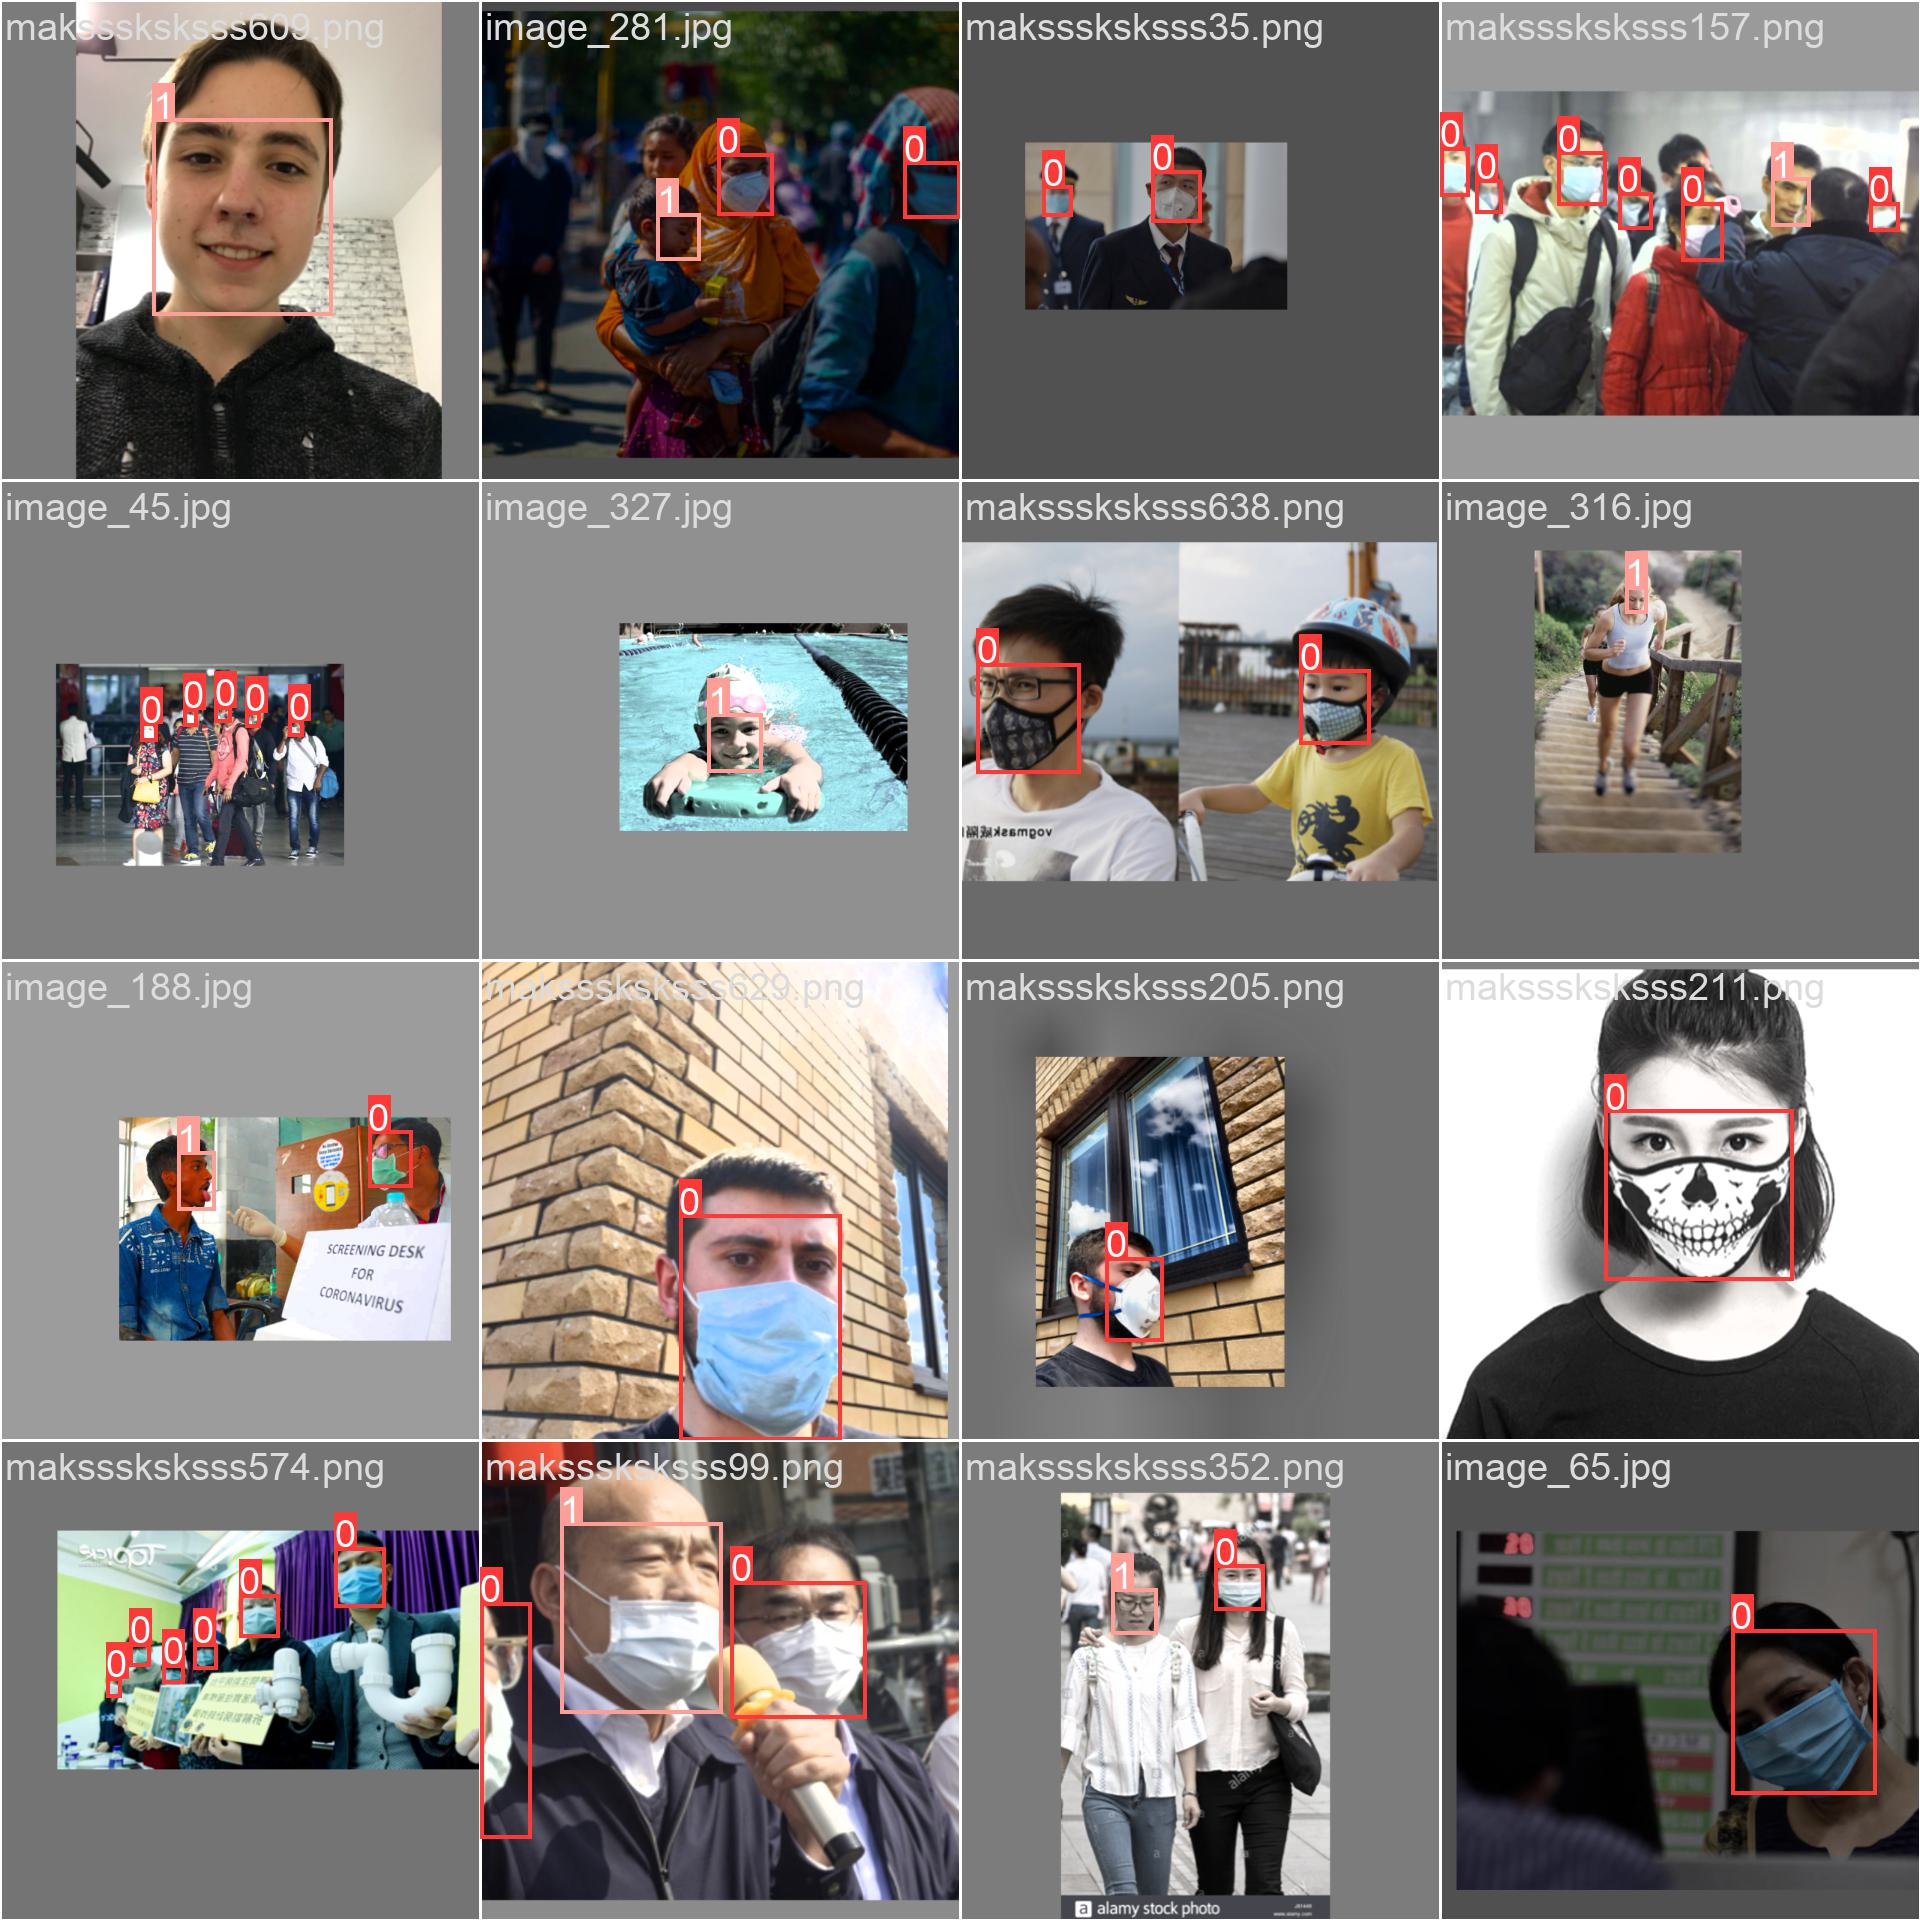

In [46]:
display(Image(filename='runs/detect/train6/train_batch0.jpg', width=600))

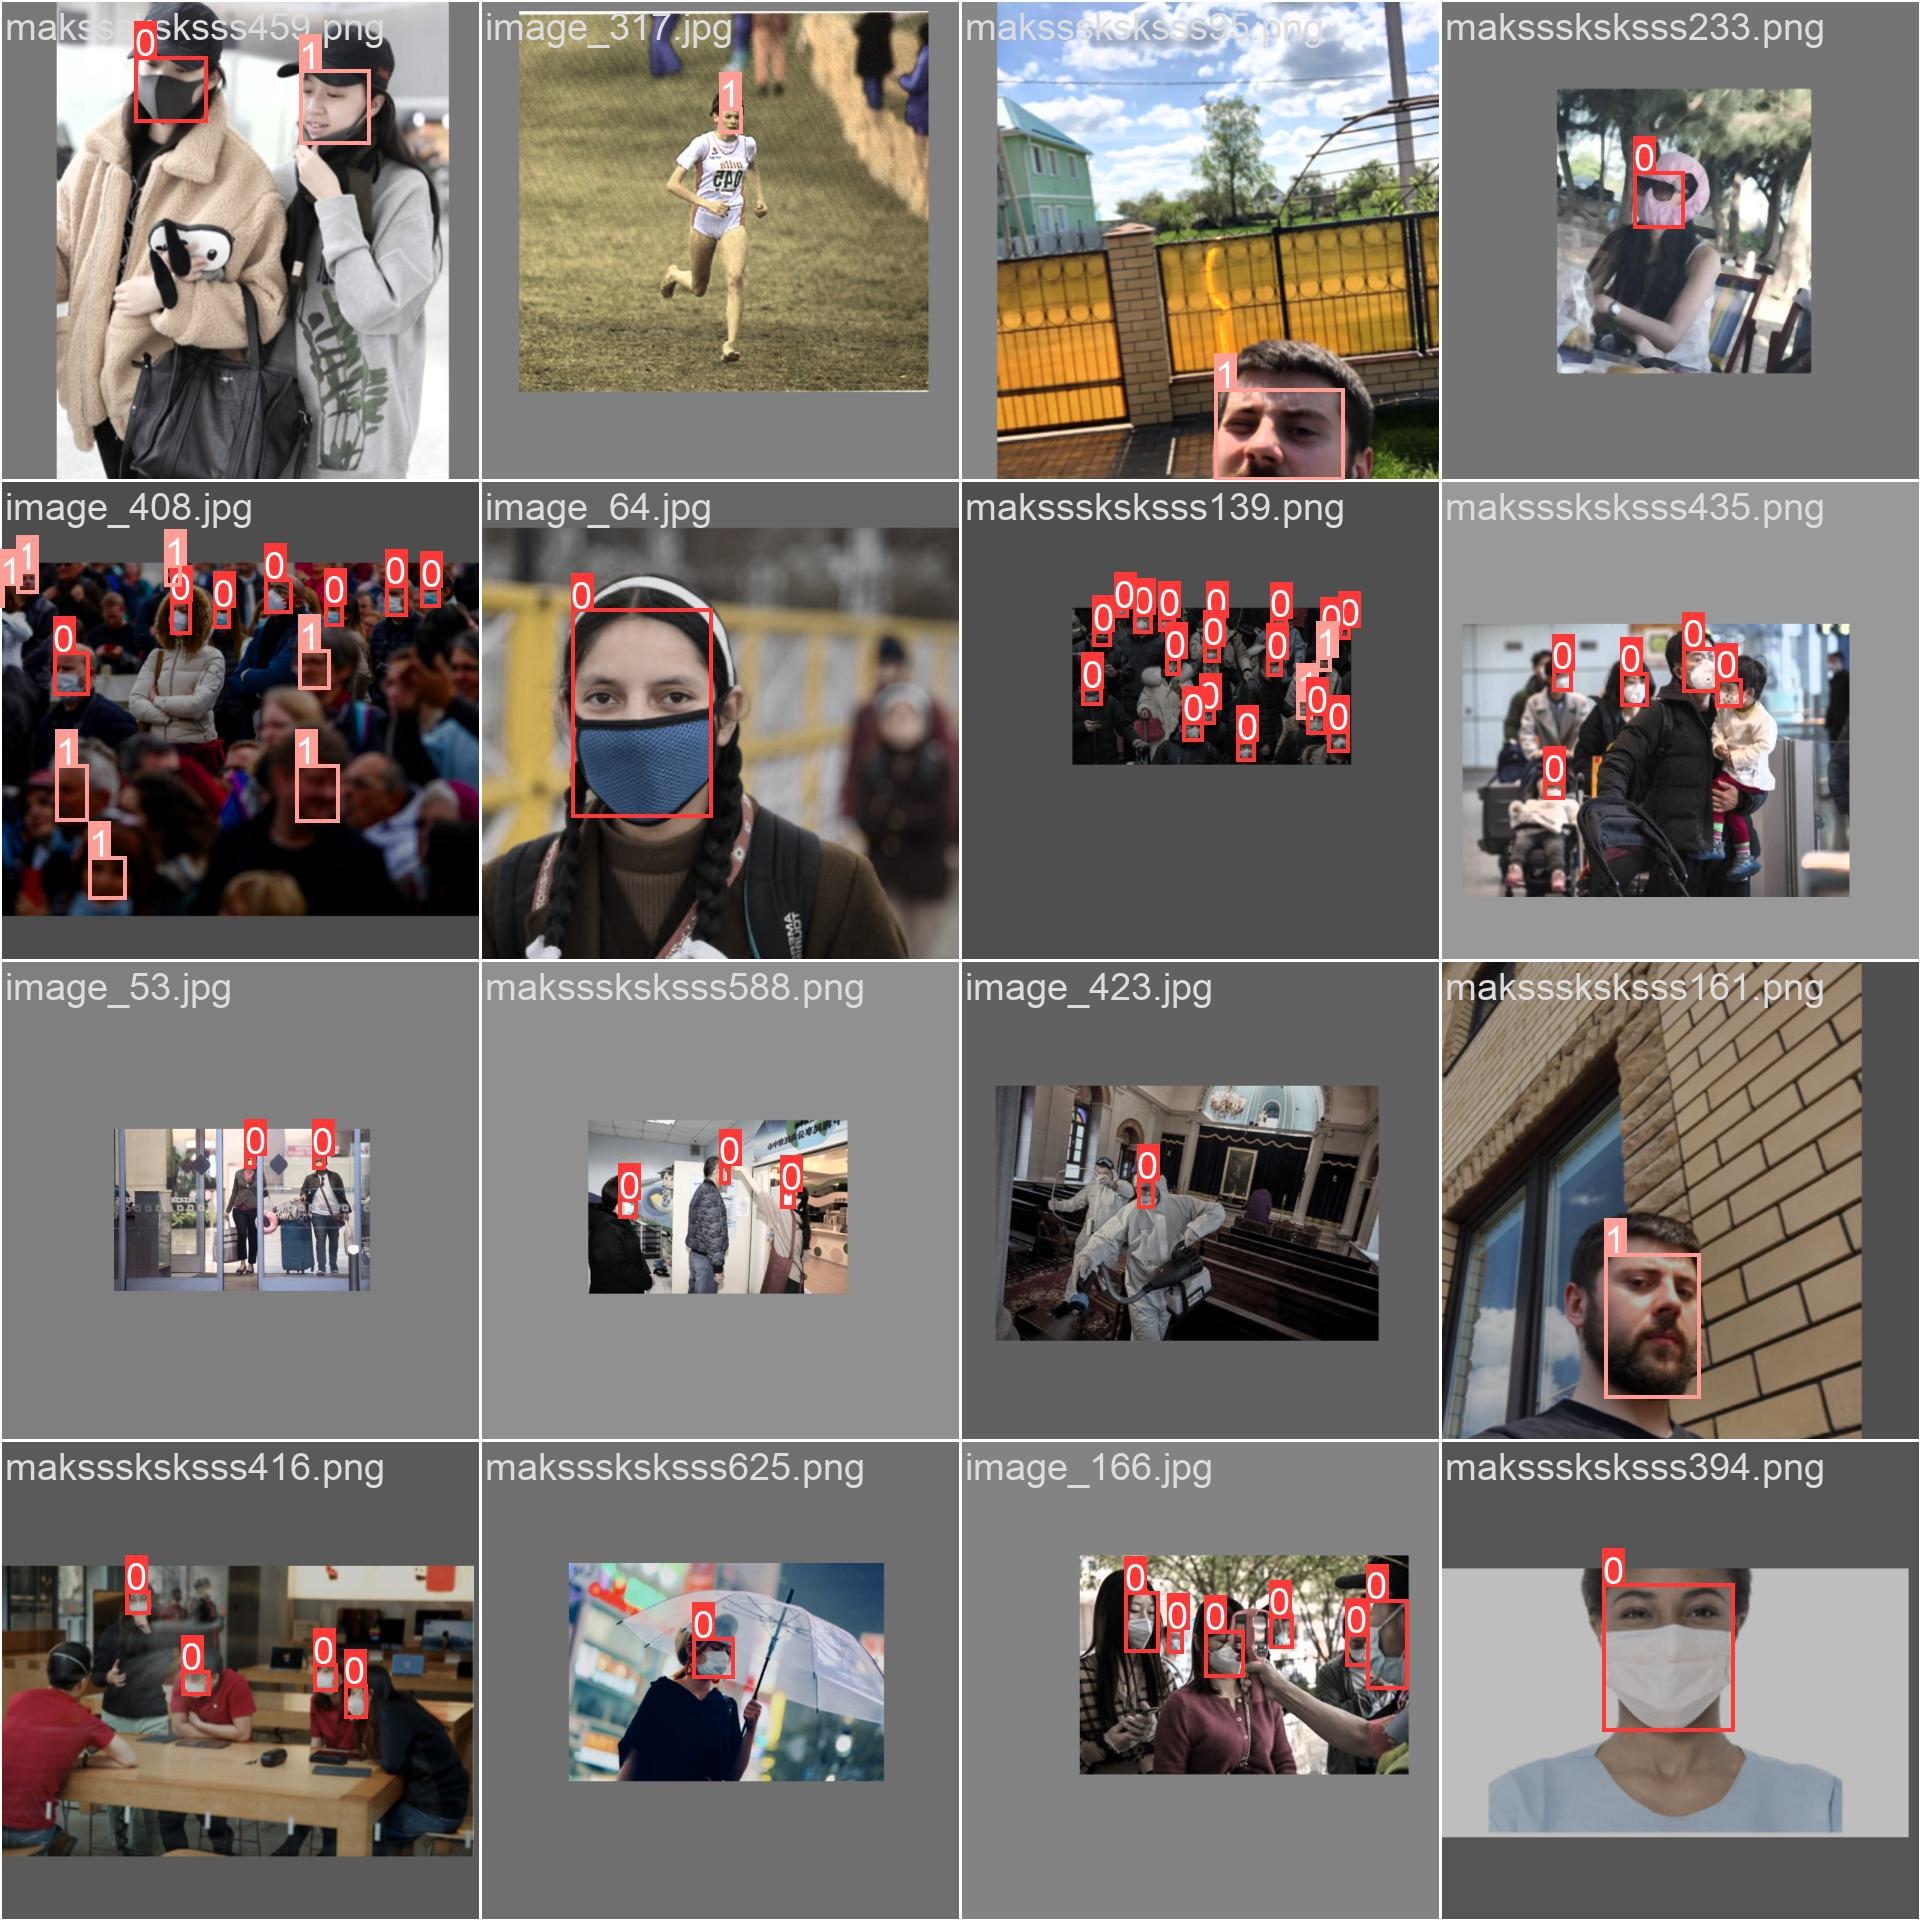

In [47]:
display(Image(filename='runs/detect/train6/train_batch1.jpg', width=600))

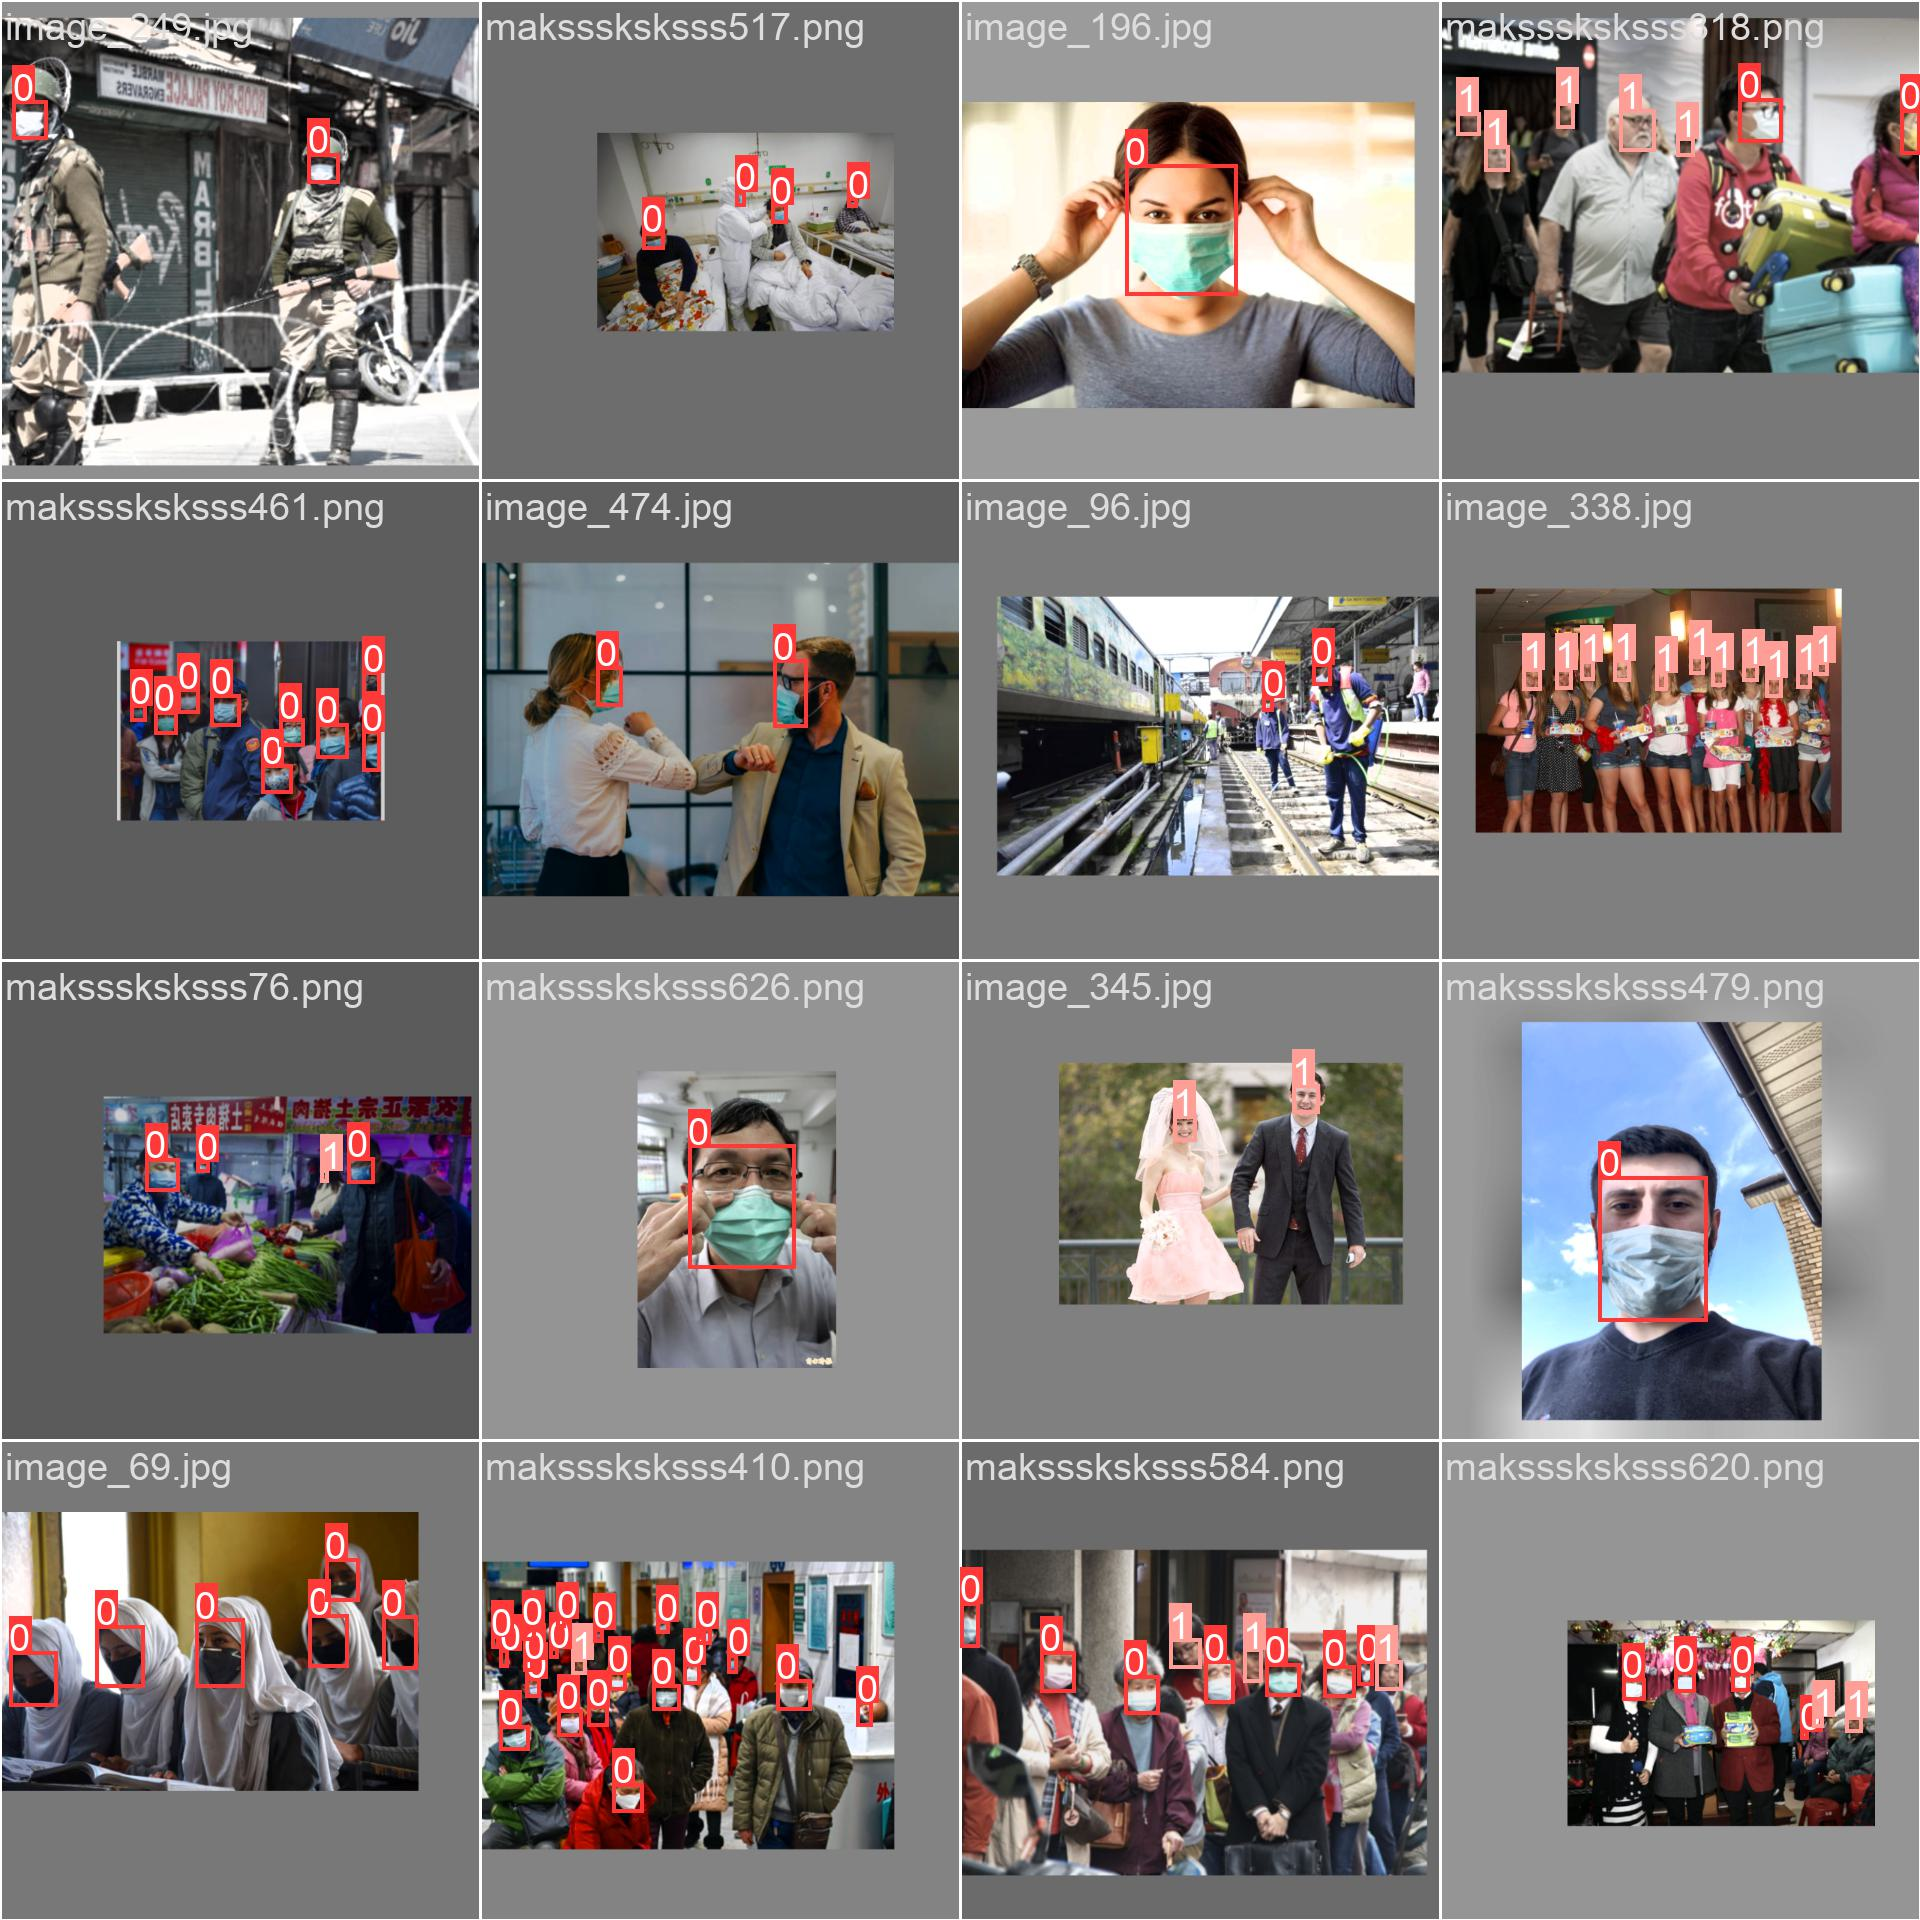

In [48]:
display(Image(filename='runs/detect/train6/train_batch2.jpg', width=600))

<h3>Validation results</h3>

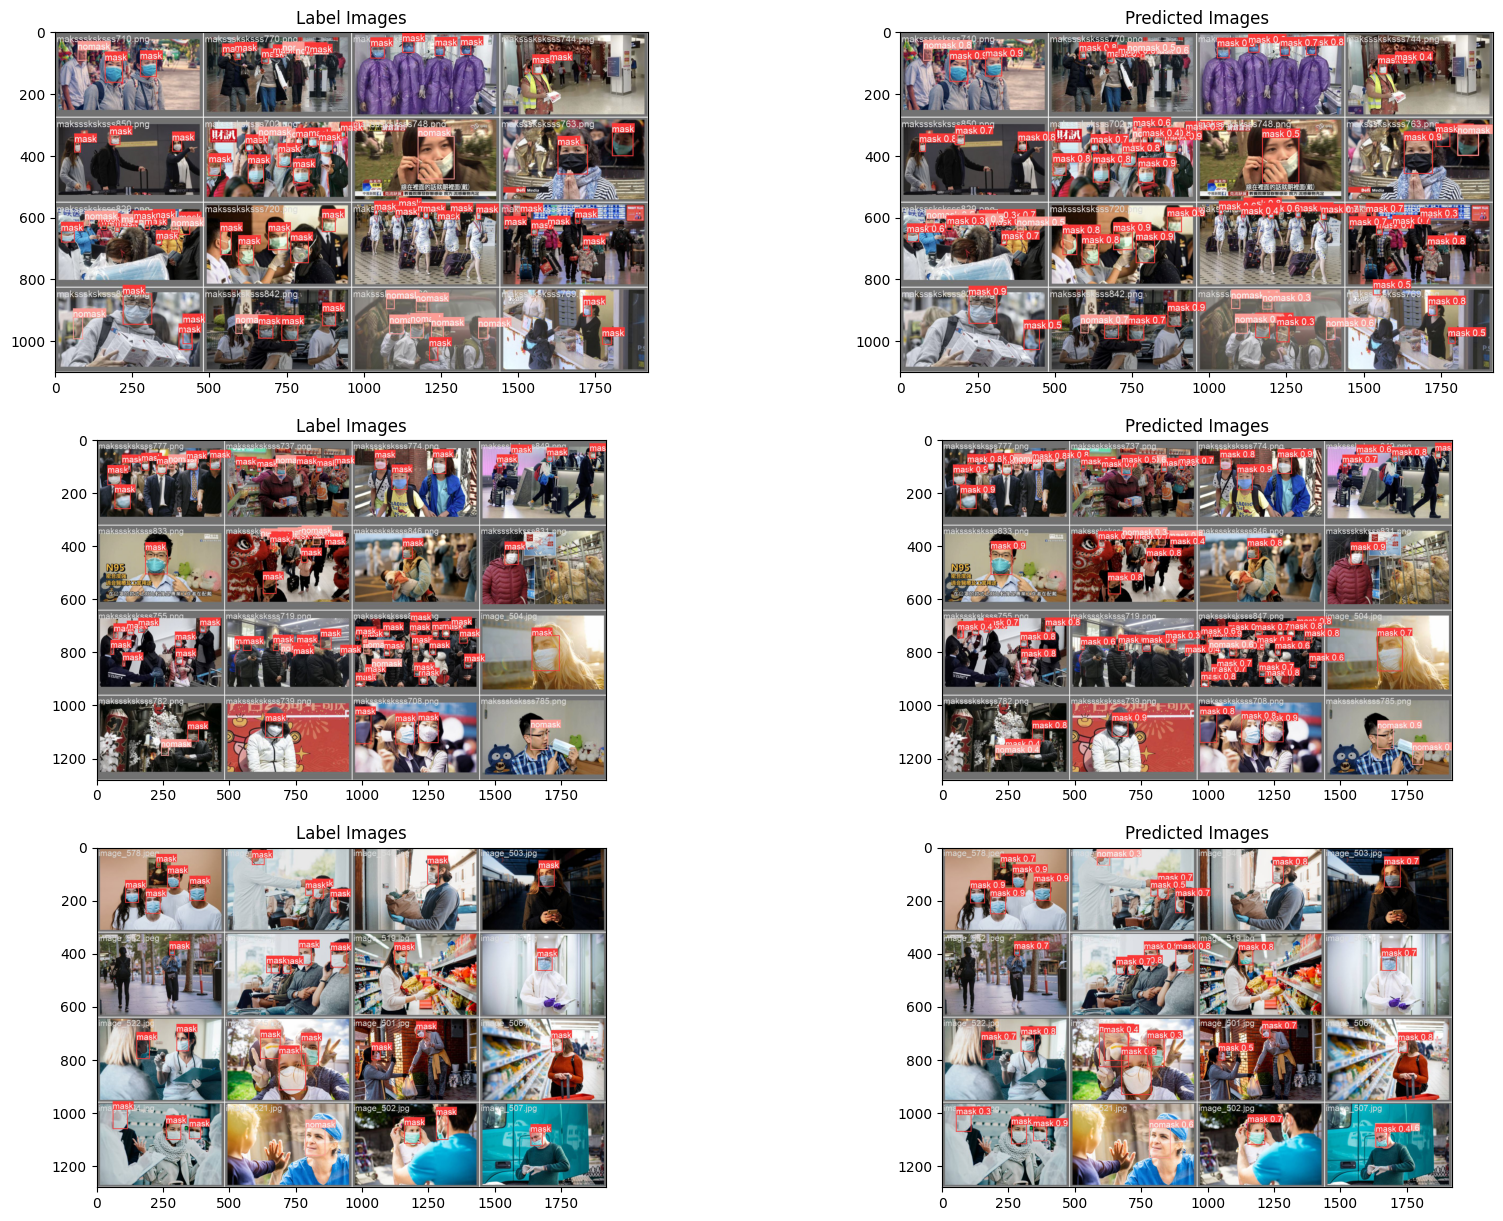

In [61]:
# figure size in inches optional
rcParams['figure.figsize'] = 20 ,15

# read images
img_AA = mpimg.imread('runs/detect/train6/val_batch0_labels.jpg')
img_AB = mpimg.imread('runs/detect/train6/val_batch0_pred.jpg')

img_BA = mpimg.imread('runs/detect/train6/val_batch1_labels.jpg')
img_BB = mpimg.imread('runs/detect/train6/val_batch1_pred.jpg')

img_CA = mpimg.imread('runs/detect/train6/val_batch2_labels.jpg')
img_CB = mpimg.imread('runs/detect/train6/val_batch2_pred.jpg')

# display images
fig, ax = plt.subplots(3,2)
ax[0][0].imshow(img_AA)
ax[0][0].title.set_text('Label Images')
ax[0][1].imshow(img_AB)
ax[0][1].title.set_text('Predicted Images')


ax[1][0].imshow(img_BA)
ax[1][0].title.set_text('Label Images')
ax[1][1].imshow(img_BB)
ax[1][1].title.set_text('Predicted Images')


ax[2][0].imshow(img_CA)
ax[2][0].title.set_text('Label Images')
ax[2][1].imshow(img_CB)
ax[2][1].title.set_text('Predicted Images')

<h3>Running the Model on unseen images and set the mode to predict</h3>

In [62]:
!yolo task=detect mode=predict model='runs/detect/train6/weights/best.pt' conf=0.55 source='test/'

Ultralytics YOLOv8.0.221 🚀 Python-3.10.9 torch-2.1.1 CPU (Apple M1)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs

image 1/15 /Users/anujjain/Desktop/Side_Project/HappyMonk/Task2/test/173.jpg: 640x640 1 nomask, 88.8ms
image 2/15 /Users/anujjain/Desktop/Side_Project/HappyMonk/Task2/test/27.jpg: 640x640 (no detections), 64.5ms
image 3/15 /Users/anujjain/Desktop/Side_Project/HappyMonk/Task2/test/crowd_mask181.jpg: 384x640 12 masks, 51.7ms
image 4/15 /Users/anujjain/Desktop/Side_Project/HappyMonk/Task2/test/crowd_mask23.jpg: 352x640 1 mask, 39.6ms
image 5/15 /Users/anujjain/Desktop/Side_Project/HappyMonk/Task2/test/crowd_mask38.jpg: 416x640 1 mask, 44.6ms
image 6/15 /Users/anujjain/Desktop/Side_Project/HappyMonk/Task2/test/crowd_mask62.jpg: 480x640 3 masks, 2 nomasks, 50.6ms
image 7/15 /Users/anujjain/Desktop/Side_Project/HappyMonk/Task2/test/crowd_mask65.jpg: 384x640 9 masks, 1 nomask, 45.6ms
image 8/15 /Users/anujjain/Desktop/Side_Project/HappyMonk/Task2/

<h3>Test Results</h3>

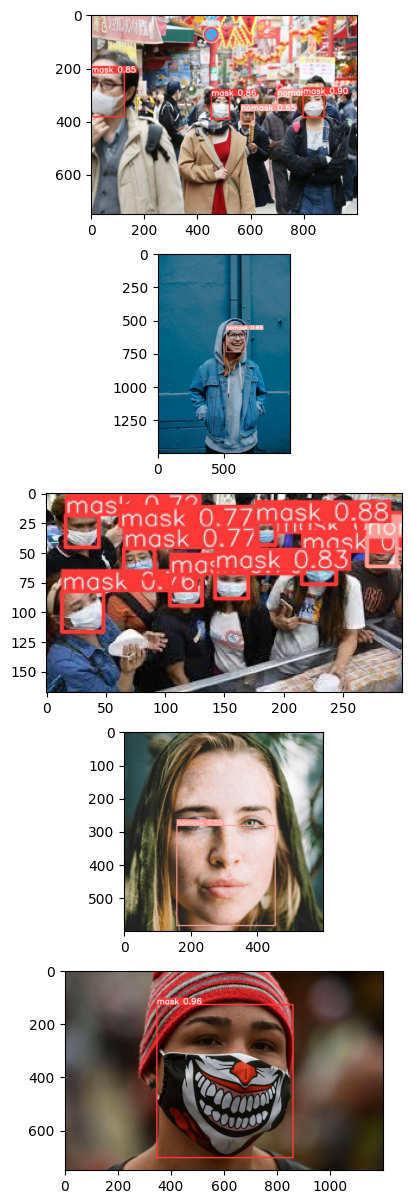

In [82]:
# figure size in inches optional
test_path='runs/detect/predict5'

rcParams['figure.figsize'] = 20 ,15

# read images
img_AA = mpimg.imread(test_path + '/crowd_mask62.jpg')
img_AB = mpimg.imread(test_path + '/image_609.jpg')

img_BA = mpimg.imread(test_path + '/crowd_mask65.jpg')
img_BB = mpimg.imread(test_path + '/173.jpg')

img_CA = mpimg.imread(test_path + '/crowd_mask38.jpg')
img_CB = mpimg.imread(test_path + '/new_116.jpg')

# display images
fig, ax = plt.subplots(5,1)
ax[0].imshow(img_AA)
ax[1].imshow(img_AB)
ax[2].imshow(img_BA)
ax[3].imshow(img_BB)



ax[4].imshow(img_CA)

